In [0]:
import numpy as np
import matplotlib.pyplot as plt
import readligo as rl
import h5py
from math import sin, cos, pi, radians

In [0]:
# Template filenames are given here https://losc.ligo.org/s/events/BBH_events_v3.json
# The files are located in e.g. https://losc.ligo.org/s/events/GW150914/GW150914_4_template.hdf5

In [0]:
events_dict = {# "event_name": ("template_filename", inclination, luminosity_distance)
    "gw150914": ("GW150914_4_template.hdf5", radians(150), 420),
    "gw151226": ("GW151226_4_template.hdf5", radians(0), 440),
    "gw170104": ("GW170104_4_template.hdf5", radians(40), 880),
    "gw150914_90incl": ("GW150914_4_template.hdf5", radians(90), 420),
}

template_filename, inclination, luminosity_distance = events_dict["gw150914"]


distance_unit = 420 #MPc (i.e. GW150914 distance)
strain_mult = 1.0*10**18 * distance_unit / luminosity_distance # strain decreases linearly with distance
time_mult = 2500


start_time = 15.895
end_time = 16.003
time_step = 0.0005#0.0002

In [0]:
template = h5py.File(template_filename, "r")
template_p, template_c = template["template"][...]

In [0]:
len(template_p)/32 # template covers 32s, at 4096 Hz

4096.0

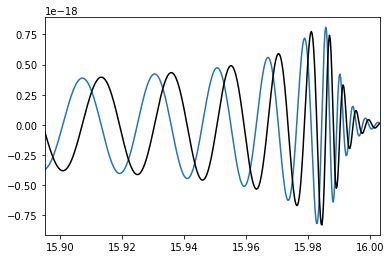

In [0]:
template_ts = np.arange(0,32, 1/4096)

plt.figure()
plt.plot(template_ts,template_p,template_ts,template_c,'k',label='template')
plt.xlim([start_time,end_time])
plt.show()

In [0]:
last_time=-10
print_strains_p=[]
print_strains_c=[]
print_times=[]
for (t,p,c) in zip(template_ts, template_p, template_c):
    if end_time >= t >= start_time and t - last_time >= time_step:
        print_strains_p.append(p)
        print_strains_c.append(c)
        print_times.append(t)
        last_time=t

In [0]:
# scale the strains and take into account the inclination (angle between orbital angular momentum of source and line of sight)
scaled_strains_p = [s * strain_mult * (1+cos(inclination)**2) / 2 for s in print_strains_p]
scaled_strains_c = [s * strain_mult * cos(inclination) for s in print_strains_c]

print_times = [(t - print_times[0]) * time_mult for t in print_times]

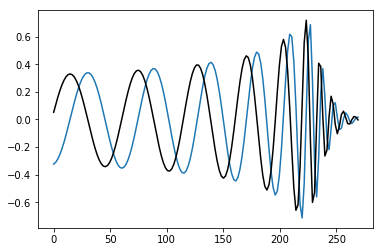

In [0]:
plt.figure()
plt.plot(print_times,scaled_strains_p,print_times,scaled_strains_c,'k',label='print_strains')
plt.autoscale(True)
plt.show()

In [0]:
with open(f"strains_polarization_{template_filename}.csv", "w") as f:
    for t,p,c in zip(print_times, scaled_strains_p, scaled_strains_c):
        f.write(f"{t}, {p}, {c}\n")